In [14]:
import importlib
import pandas as pd
import matplotlib.pyplot as plt
import metricas_plots

In [37]:
importlib.reload(metricas_plots)
from metricas_plots import PlotsMetricas, T, F
p = PlotsMetricas()

## Análise Exploratória

In [35]:
dados = pd.read_csv("dados/ariel_limpo_log10.csv.gz", compression="gzip")
print(dados.shape)

(126671, 27)


In [7]:
print(dados.columns)

Index(['fileid', 'RA', 'Dec', 'z', 'atflux', 'atmass', 'aZflux', 'aZmass',
       'mass_log10', 'Av', 'oiii_5007_ew', 'oiii_5007_ew_err', 'nii_6584_ew',
       'nii_6584_ew_err', 'oii_3727_ew', 'oii_3727_ew_err', 'halpha_ew',
       'halpha_ew_err', 'hbeta_ew', 'hbeta_ew_err', 'oii_3727_ew_log10',
       'oiii_5007_ew_log10', 'nii_6584_ew_log10', 'halpha_ew_log10',
       'hbeta_ew_log10', 'nii_halpha_log10', 'oiii_hbeta_log10'],
      dtype='str')


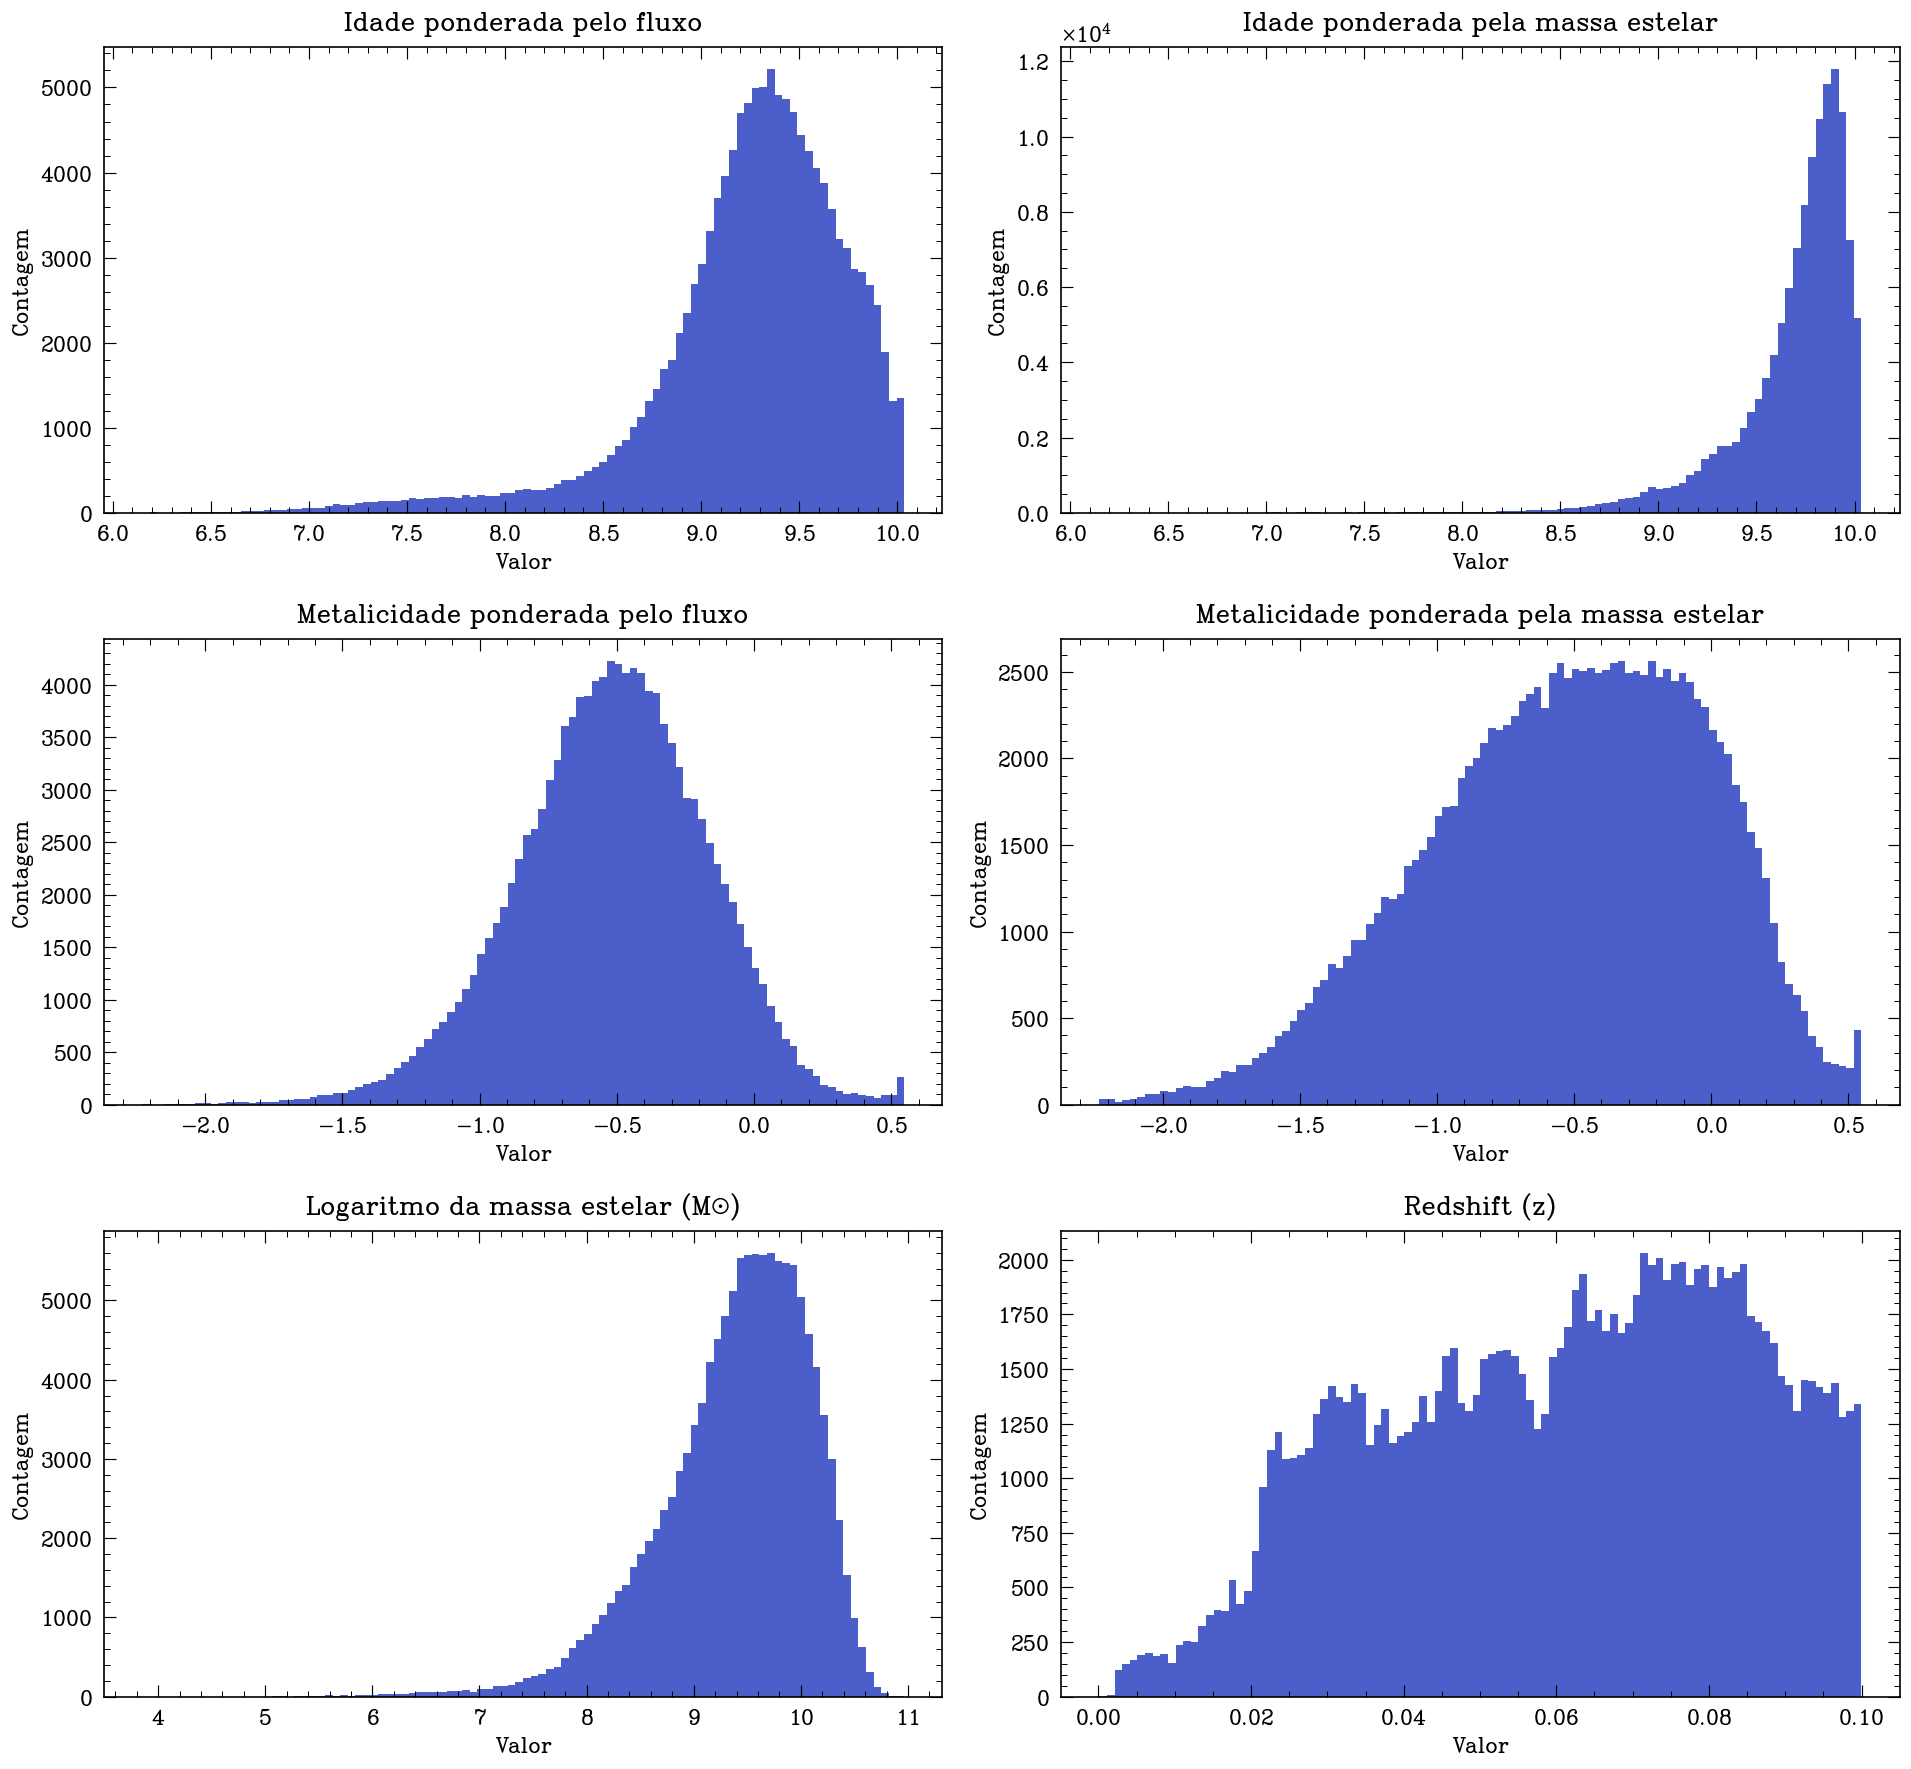

In [ ]:
fig, axs = plt.subplots(3, 2, figsize=(10*p.phi, 15))
p.histogram_v(dados["atflux"], "Idade ponderada pelo fluxo", axs[0][0], cor="#4B5EC9")
p.histogram_v(dados["atmass"], "Idade ponderada pela massa estelar", axs[0][1], cor="#4B5EC9")
p.histogram_v(dados["aZflux"], "Metalicidade ponderada pelo fluxo", axs[1][0], cor="#4B5EC9")
p.histogram_v(dados["aZmass"], "Metalicidade ponderada pela massa estelar", axs[1][1], cor="#4B5EC9")
p.histogram_v(dados["mass_log10"], 'Logaritmo da massa estelar (M☉)', axs[2][0], cor="#4B5EC9")
p.histogram_v(dados["z"], "Redshift (z)", axs[2][1], cor="#4B5EC9")
plt.tight_layout()
plt.show()

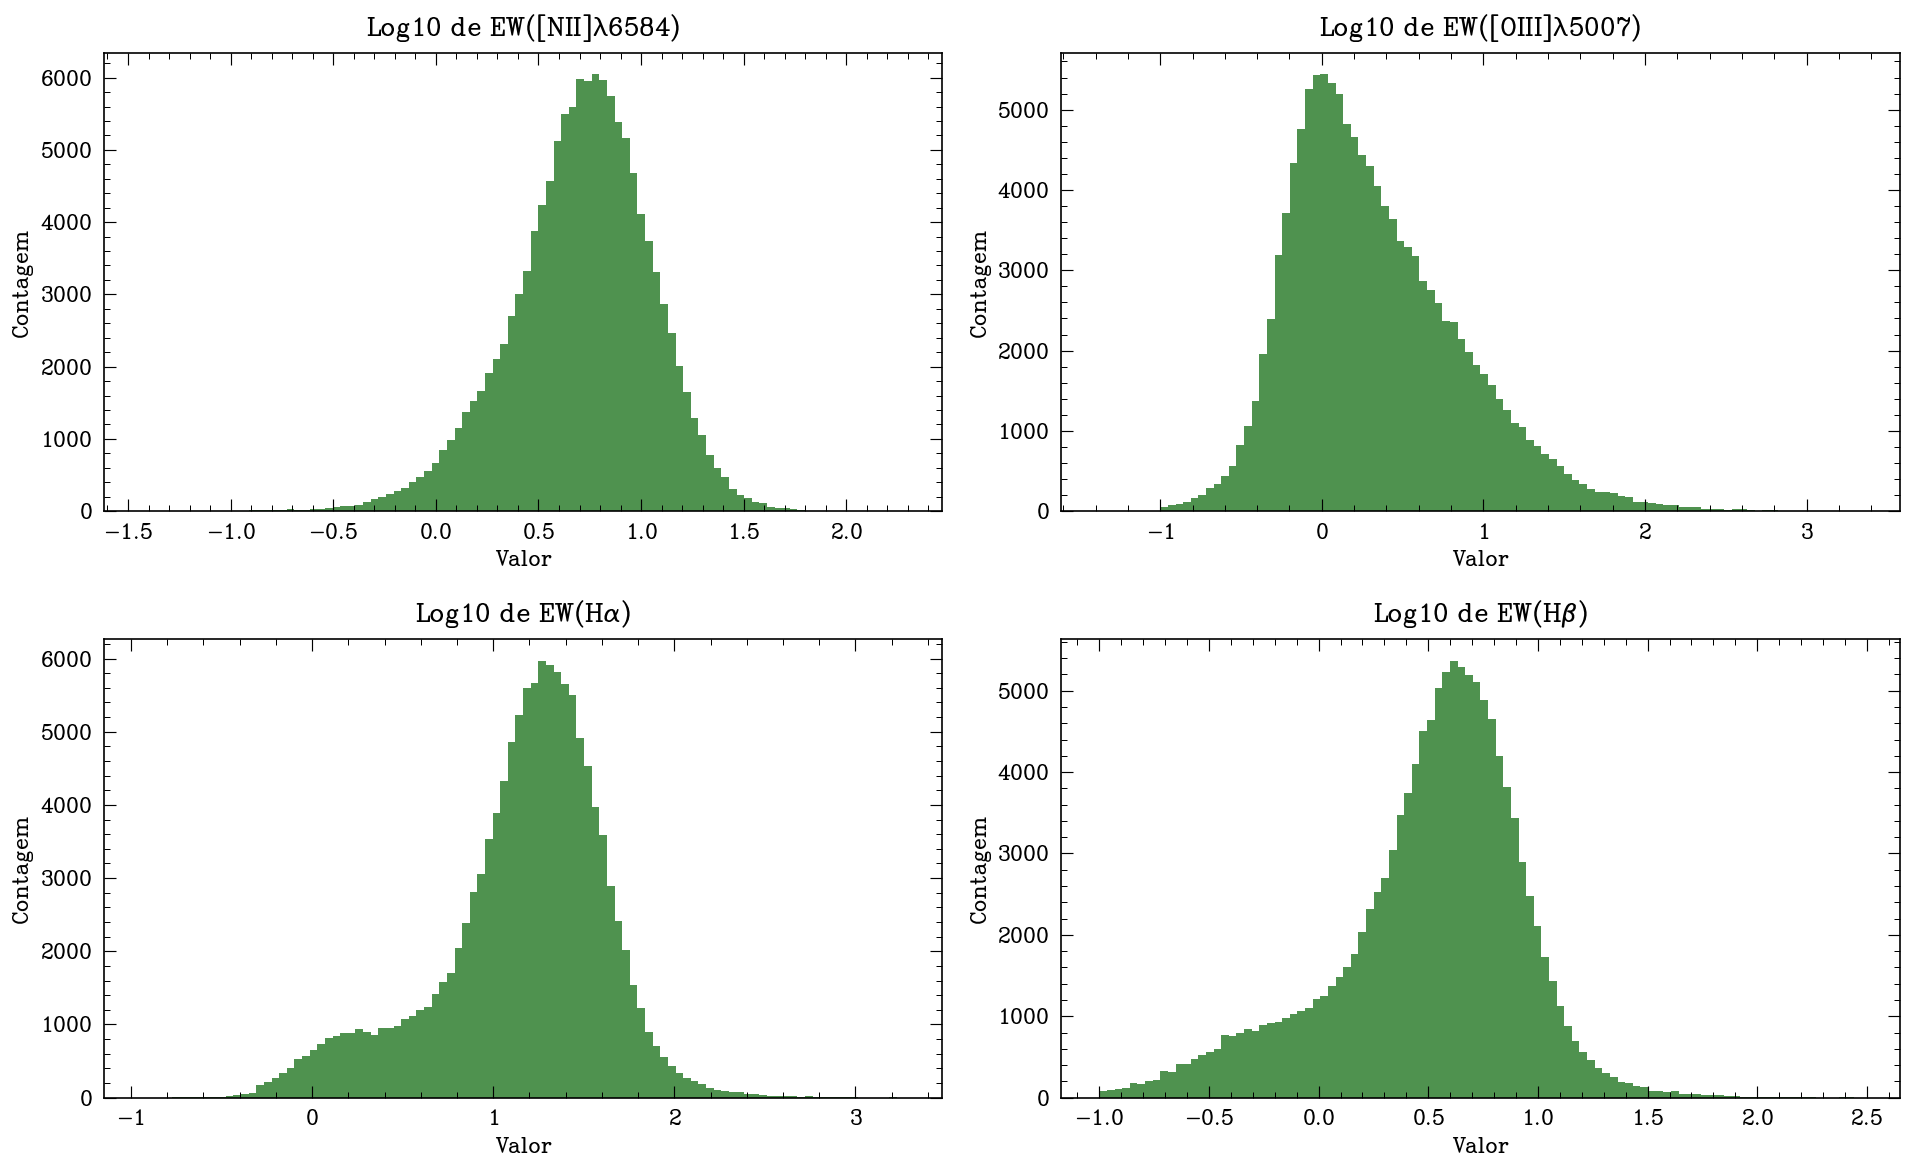

In [33]:
fig, axs = plt.subplots(2, 2, figsize=(10*p.phi, 10))
p.histogram_v(dados["nii_6584_ew_log10"], r"Log10 de EW([NII]$\lambda6584$)", axs[0][0], cor="#4F924F")
p.histogram_v(dados["oiii_5007_ew_log10"], r"Log10 de EW([OIII]$\lambda5007$)", axs[0][1], cor="#4F924F")
p.histogram_v(dados["halpha_ew_log10"], r"Log10 de EW(H$\alpha$)", axs[1][0], cor="#4F924F")
p.histogram_v(dados["hbeta_ew_log10"], r"Log10 de EW(H$\beta$)", axs[1][1], cor="#4F924F")
#p.histogram_v(dados["oii_3727_ew_log10"], r"Log da EW [OII]$\lambda3727$", cor="#4F924F")
plt.tight_layout()
plt.show()

## Diagramas de diagnóstico

In [36]:
M = int(dados.shape[0] * 0.20) # 20% dos dados
dados_ = dados.sample(n=M, random_state=4321).reset_index().copy()
print(dados_.shape)

(25334, 28)


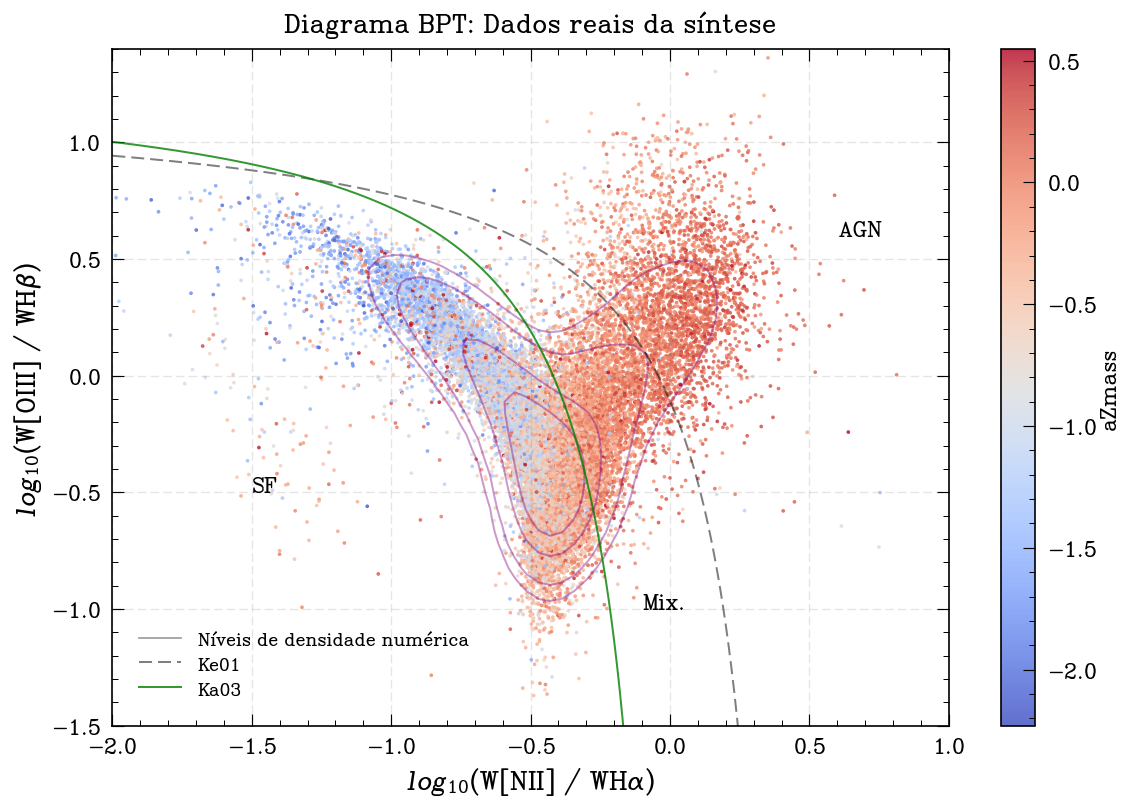

In [43]:
def show_bpt(color=None):
    plt.figure(figsize=(10, 7))
    scatter1 = plt.scatter(dados_[T.nii_ha.value], dados_[T.oiii_hb.value], c=dados_[F.azmass.value].values, 
                        alpha=0.8, s=5, cmap='coolwarm', edgecolors='none')
    cbar = plt.colorbar(scatter1)
    cbar.set_label(F.azmass.value, rotation=90, labelpad=2)
    p.curvas_densidade(dados_[T.nii_ha.value], dados_[T.oiii_hb.value])
    p.bpt_config('Diagrama BPT: Dados reais da síntese')

show_bpt()

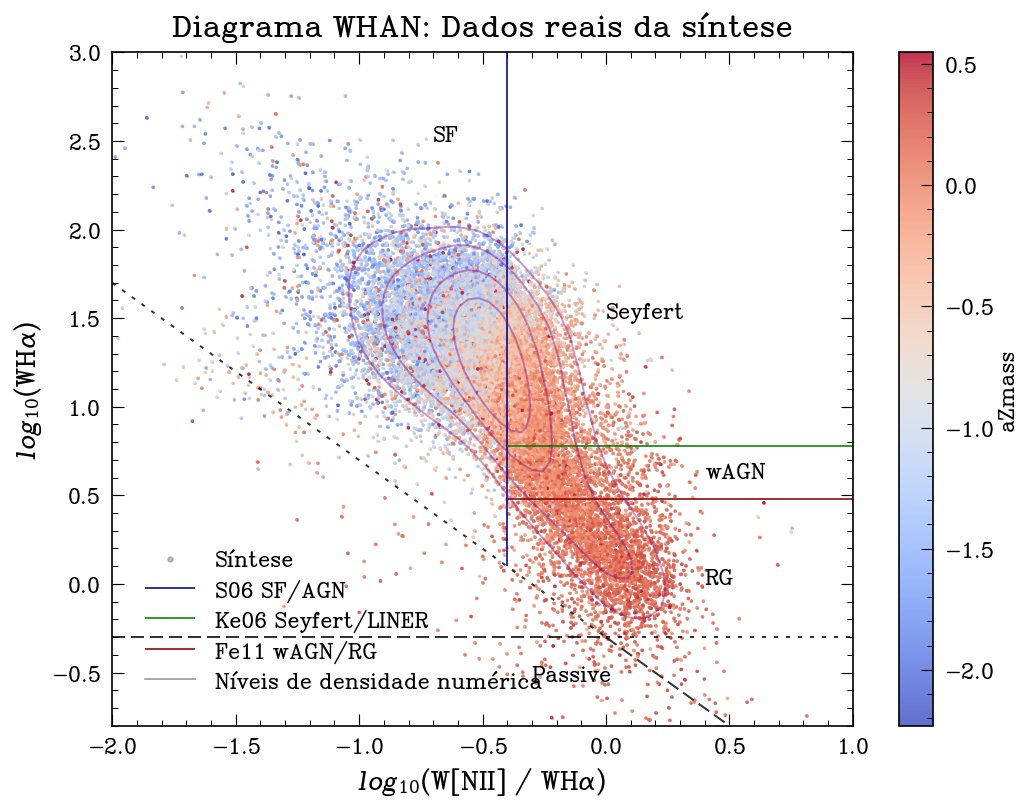

In [44]:
def show_whan(color=None):
    p.plot_whan(dados_[T.nii_ha.value] , dados_[T.ha.value], 'Diagrama WHAN: Dados reais da síntese')
    scatter2 = plt.scatter(dados_[T.nii_ha.value] , dados_[T.ha.value], c=dados_[color].values, 
                        alpha=0.8, s=5, cmap='coolwarm', edgecolors='none')
    cbar = plt.colorbar(scatter2)
    cbar.set_label(color, rotation=90, labelpad=2)
    p.curvas_densidade(dados_[T.nii_ha.value] , dados_[T.ha.value])
    plt.legend(loc='lower left', fontsize='medium', markerscale=4, facecolor='white')
    plt.tight_layout()
    plt.show()

show_whan(F.azmass.value)